# Hypothesis testing and Estimation

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = 'whitegrid')

from IPython.display import Markdown, HTML

## Introduction

In [last lecture](21-eda.ipynb), we discussed about graphical and numerical description and summary of a given sample (data). That area of statistics is known as **descriptive statistics** or **exploratory data analysis**.

In this lecture, we will discuss about another area of statistics called **inferential statistics**, by which we aim to prove/disprove **hypotheses** regarding **underlying probabilistic process which has generated the data** and **estimate parameters** of the  underlying process. 

So, there are two main ways by which we aim to understand the underlying data generating process:

1. **Hypothesis testing framework**

1. **Estimation framework**

## Probabilistic Processes

In a [previous lecture](20-normal-dist.ipynb#process), we discussed that **human ignorance** converts a deterministic process into a probabilistic one.

We also discussed about [probability distributions](20-normal-dist.ipynb#prob_dist) and found that there are various families of probability distributions which are described by combination of parameters (like mean ($\mu$) and standard deviation ($\sigma$) for normal distribution, probability of success ($p$) for bernoulli distribution, and so on).

In conventional terms, probabilistic processes are usually called as **population**.

## Probabilistic Process $\rightarrow$ Samples

The central **assumption** of inferential statistics is that **probabilistic processes** are at work in background, **hidden from human**. What human **observe**, are the **random samples** generated out of those processes.

As an example, let us assume that the underlying probabilistic process for coin tossing is bernoulli distribution with probability of success (getting heads) being 0.5

In [2]:
# underlying process
bern_process = st.bernoulli(p = 0.5)

The following is a random sample (of size 10) out of the above underlying process. It depicts results of coin tossing 10 times, and assigning 1 if we get heads.

In [3]:
# 1st sample
samp1_bern_process = bern_process.rvs(size = 10)
samp1_bern_process

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1])

The following is another random sample (of size 20) out of the underlying process. It means results of coin tossing 20 times, and assigning 1 if we get heads.

In [4]:
# 2nd sample
samp2_bern_process = bern_process.rvs(size = 20)
samp2_bern_process

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

`samp1_bern_process` and `samp2_bern_process` are two of the infinitely possible **random samples** (which are **observed**) from the `bern_process` (a **probabilistic process** which is **not observed**).

## Central problem of inferential statistics: sample (known) $\rightarrow$ probabilistic process (unknown)

***(Guessing probabilistic process from the given observed sample)***

The central problem in inferential statistics is that we have a sample, which is given, from which we have to guess about the underlying process. There are two frameworks for doing that.

1. Prove/disprove about a hypothesised underlying probabilistic process given a particular sample. **Hypothesis testing framework (p values)**

2. Estimate the underlying probabilistic process given a particular sample. **Estimation framework (confidence intervals)**

## Hypothesis testing framework {#hypothesis}

> My baby don't value what I really do.<br>
She only imagines who else might come through.<br>
She'll only consider my worth to be high<br>
If she can't conceive of some much bigger guy.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*John K Krushke, Doing Bayesian Analysis, 2015*

In recent past hypothesis testing framework has been variously criticized, mostly due to misunderstanding of concept of p values as mentioned [here](https://www.statisticsdonewrong.com/p-value.html), 
[here](https://onlinelibrary.wiley.com/doi/full/10.1016/j.pmrj.2015.02.011), 
[here](https://pmj.bmj.com/content/96/1131/1) and [here](https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-020-01051-6).

But the framework is one of the pillar of scientific thinking and methodology and understanding it is a must for any researcher. 

### Goal

**Goal of inference:** Decide whether a particular value of parameter (of underlying probabilistic process) can be rejected.

> A given coin is fair

**Question:** Whether we can reject the "null" hypothesis that probability of head coming is 0.5 $(p = 0.5)$. 

### Logic of framework

- Suppose, the coin is fair $(p = 0.5)$ (_Underlying process_ of null hypothesis, bernoulli process with $p = 0.5$).

- When we flip the coin (_random experiment_), we **expect** that **half** of the flips will result in heads.

- If the **actual number of heads** (_particular sample_) is **far greater or fewer** than half of the flips, we **reject the null hypothesis** that coin is fair.

<p style='text-align:center'><strong>How much far is significant?<br>For finding "farness" ...</strong></p>

- We need to figure out **exact probabilities** of **all possible outcomes**.

- We will calculate **probability** of getting an **outcome as far as or more far than the current sample**.

<p style='text-align:center'><strong>The above is called p value</strong></p>

- If the probability is less than a particular threshold (say, 0.05), we decide to **reject the null hypothesis**

### Example

Let us say, we are carrying out an experiment in which we are tossing a coin and observing whether it falls on head or tail. If it falls head, we call it success.

Let us say that we have the following stream of head (H) and tail (T), which is our random sample from the underlying bernoulli process.

$$
TTHHTTHTTTTTTTTTHTTHHTTH
$$

We see that number of heads (success) is 7 out of the total of 24 tosses (experiment runs) and that the last toss resulted in a head (success).

In [5]:
N = 24
success = 7

In [ ]:
Markdown(f'We see that the proportion of success for the above sample is **{success / N:.3f}**, which is **less than the process \
under null hypothesis**, which would have been **0.5**')

We see that the proportion of success for the above sample is **0.292**, which is **less than the process under null hypothesis**, which would have been **0.5**

**How to check if 0.292 is far enough from 0.5 so that null hypothesis (coin is unbiased) can be rejected ???**

As described above, for the above we have to calculate probabilities of occurrence of all the possible samples.

We have to understand, as to how the experimenter got the above sample.

Experimenter could have done one of the following:

1. Calculated number of heads after a **fixed number of tosses**. He keeps **N fixed** before starting the experiment.

2. Calculated number of tosses at which he got a **fixed number of heads (successes)**. He keeps the **number of success fixed** before starting the experiment.

3. Calculated number of heads and number of tosses after a **fixed duration of time**.

#### Keeping N fixed at 24 (binomial distribution)

Possible outcomes will be number of heads coming (which can be 0, 1, ..., 24).

The following is the probability distribution under null hypothesis (binomial distribution with p = 0.5)

In [7]:
# Binomial distribution for which the outcome is the number of heads (successes) out of a fixed number of 
# tosses (experiments) of 24

# Binomial distribution under null hypothesis of unbiased coin which translates into  probability of success 
# (getting heads) of 0.5

null_hypoth_Nfixed = st.binom(n = N, p = 0.5)

In [8]:
# vector of all possible outcomes

successes = np.arange(N + 1)

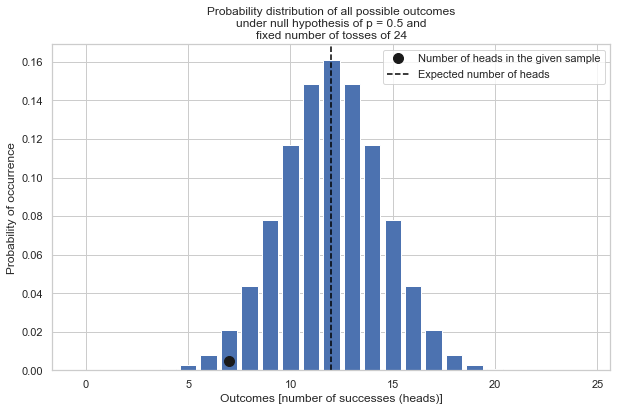

In [9]:
f, ax = plt.subplots(figsize = (10, 6))

# PMF is the probability mass function, which is the probability of occurrence of particular outcome
ax.bar(successes, null_hypoth_Nfixed.pmf(k = successes))

ax.plot(success, 0.005, 'ko', markersize = 10, label = 'Number of heads in the given sample')
ax.axvline(12, c = 'black', linestyle = 'dashed', label = 'Expected number of heads')
ax.set_xlabel('Outcomes [number of successes (heads)]')
ax.set_ylabel('Probability of occurrence')
_ = ax.set_title('Probability distribution of all possible outcomes\nunder null hypothesis of p = 0.5 and\n'
'fixed number of tosses of 24')
_ = ax.legend()

In [10]:
Markdown(f'The **probability** that the number of heads is **equal to {success} or lesser than {success}** is **{null_hypoth_Nfixed.cdf(success):.3f}**')

The **probability** that the number of heads is **equal to 7 or lesser than 7** is **0.032**

The above probability is **one sided p value**

In [11]:
Markdown(f'The **probability** that the number of heads is **equal to {success} or more extreme than that** is **{2 * null_hypoth_Nfixed.cdf(success):.3f}**')

The **probability** that the number of heads is **equal to 7 or more extreme than that** is **0.064**

The above probability is **two sided p value**

Since, the two sided p value is > 0.05, we say that **we do not have adequate evidence to reject the null hypothesis** that the coin is unbiased, given the current sampling strategy **(fixed number of tosses)** and testing strategy **(binomial distribution and rejection probability of 0.05)**

#### Keeping success fixed at 7 (negative binomial distribution)

Possible outcomes will be number of failures before which 7<sup>th</sup> success (head) occurs (which can be 0, 1, ..., 17, ...).

The following is the distribution under null hypothesis

In [12]:
# Negative Binomial distribution for which the outcome is the number of failures for a fixed number of 
# successes of 7

# Negative Binomial distribution under null hypothesis of unbiased coin which translates into  probability of success 
# (getting heads) of 0.5

null_hypoth_sfixed = st.nbinom(n = success, p = 0.5)

In [13]:
# vector of all possible outcomes

failures = np.arange(N)

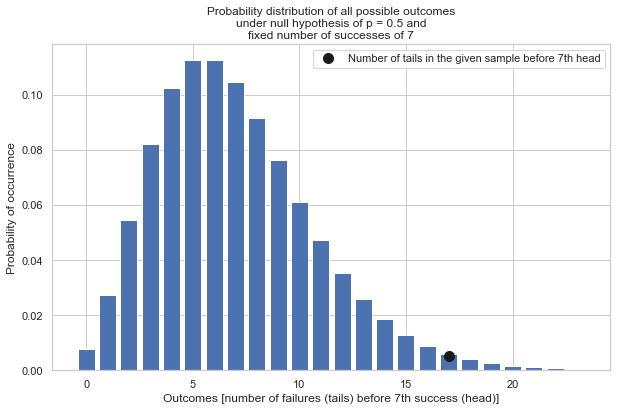

In [14]:
f, ax = plt.subplots(figsize = (10, 6))

# PMF is the probability mass function, which is the probability of occurrence of particular outcome
ax.bar(failures, null_hypoth_sfixed.pmf(k = failures))

ax.plot(N - success, 0.005, 'ko', markersize = 10, label = 'Number of tails in the given sample before 7th head')
ax.set_xlabel('Outcomes [number of failures (tails) before 7th success (head)]')
ax.set_ylabel('Probability of occurrence')
_ = ax.set_title('Probability distribution of all possible outcomes\nunder null hypothesis of p = 0.5 and\n'
'fixed number of successes of 7')
_ = ax.legend()

In [15]:
Markdown(f'The **probability** that the number of tails is **equal to {N - success} or greater than {N - success}** is **{1 - null_hypoth_sfixed.cdf(N - success):.3f}**')

The **probability** that the number of tails is **equal to 17 or greater than 17** is **0.011**

The above probability is **one sided p value**

In [16]:
Markdown(f'The **probability** that the number of tails is **equal to {N - success} or more extreme** is **{2 * (1 - null_hypoth_sfixed.cdf(N - success)):.3f}**')

The **probability** that the number of tails is **equal to 17 or more extreme** is **0.023**

The above probability is **two sided p value**

Since, the two sided p value is < 0.05, we say that **we have adequate evidence to reject the null hypothesis** that the coin is unbiased, given the current sampling strategy **(fixed number of heads)** and testing strategy **(negative binomial distribution and rejection probability of 0.05)**

<h3 style='color:red;text-align:center'>p values do change with differing sampling and testing strategies for the same sample</h3>

### Conclusion: Understanding p value

<img src='figs/pval.png' alt='p value meaning' style='width:70%'>

### Pitfalls of the hypothesis testing framework

#### Pitfall 1 {#pitfall1}

Only a **single candidate probabilistic process** is tested for rejection (null hypothesis process) against the **given sample**. It does not tell us anything about other potential processes.

[**Estimation framework**](#estimation), which will be discussed below is a wayaround for the above pitfall.

#### Pitfall 2 {#pitfall2}

This is a much graver and difficult to comprehend pitfall.

The basic assumption of hypothesis testing is that the null hypothesis (process associated with it) is true and we are checking the farness of the given sample from the probability distribution of the null hypothesis process.

The above framework says that **given that null hypothesis is true, what is the probability that the given sample belongs to the null hypothesis process**. But we donot know the truthness of the null hypothesis to start with. 

**We reject the null hypothesis based on the p value, which is the controversial and inappropriate step.**

Commonly what we want to infer is that **given the present sample, what is the probability that the null hypothesis is true or false**.

Unfortunately to get the above answer, we need to know **baseline probability of truthness of the null hypothesis**.

**Bayesian framework** helps us in answering it.

## Estimation framework {#estimation}

The second way to infer underlying process from the given sample is to estimate the parameter of the underlying process from the given sample.

Estimation framework addresses the [pitfall 1 of hypothesis testing framework](#pitfall1)

Broadly the framework **collects all possible underlying probabilistic processes**, which are then tested against the given sample (as done in the [hypothesis testing framework](#hypothesis)) for rejection. **Only those processes are kept which are not rejected by the testing process.**

The interval which contains the above process parameters (which are not rejected) is known as **Confidence Interval** (@fig-ci).

### Example

Let us take the above example of **7 heads out of 24 tosses (which was fixed from start)** (sample) from a coin. We want to find out the **biasness of coin**, which is denoted by probability of head coming (Prob) (underlying process, bernoulli process). **If Prob = 0.5, we say the the coin is unbiased**.

Now we want to estimate, as to the possible values of Prob, which will not be rejected when tested against the given sample.

In [17]:
N = 24
heads = 7

# all possible probabilities of obtaining heads, which will be used to create null hypothesis
H0_prob_heads = np.linspace(0, 1, 100)

# underlying probabilistic processes one for each H0_prob_head
binom_processes = st.binom(n = N, p = H0_prob_heads)

# p values, which measure farness of the given sample 7/24 from the 
# underlying processes under null hypotheses
p_vals = 2 * np.where(binom_processes.cdf(heads) > 0.5, \
                      1 - binom_processes.cdf(heads), \
                      binom_processes.cdf(heads))

In [18]:
pd.DataFrame({'H0_probab_head': H0_prob_heads[::2], \
              'p_val': p_vals[::2]}).style.\
applymap(lambda x: 'color:red' if x < 0.05 else '', 'p_val')

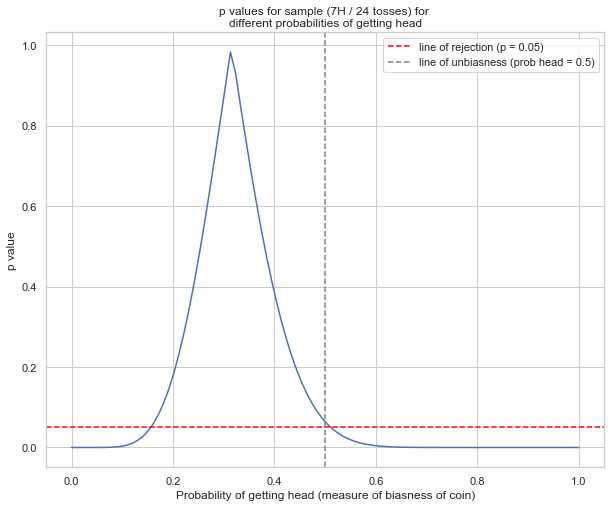

In [19]:
f, ax = plt.subplots(figsize = (10, 8))
plt.plot(H0_prob_heads, p_vals)
ax.axhline(0.05, linestyle = 'dashed', color = 'red', label = 'line of rejection (p = 0.05)')
ax.axvline(0.5, linestyle = 'dashed', color = 'gray', label = 'line of unbiasness (prob head = 0.5)')
ax.set_xlabel('Probability of getting head (measure of biasness of coin)')
ax.set_ylabel('p value')
ax.set_title('p values for sample (7H / 24 tosses) for \ndifferent probabilities of getting head')
_ = ax.legend()

So, in the above example, the **95% confidence interval** is **0.1616 to 0.505**. It is **95%** because the **p value for rejecting null hypothesis process is set at 0.05** and 0.95 = 1 - 0.05

Also, as the interval **includes the unbiased process (probability of getting heads of 0.5) inside it**, we say that **we are not able to reject the null hypothesis that the coin is unbiased**. The same information is also obtained from hypothesis framework.

We obtain **additional information** in estimation framework that the **parameter of the underlying probabilistic bernoulli process** (which is the probability of getting head for the said coin) can be anything between **0.1616 and 0.505**. There is 5% chance (= 100% - 95%) that the interval will miss the real parameter.

It is important to realize that the **confidence interval is not a probability distribution of underlying process parameter**. It does not tell us that there is higher chance that probability of getting head is 0.3 than, say, it is 0.5 or 0.2.

### Informations obtained from confidence interval {#effect}

1. **Precision of estimate (@fig-ci):** A **narrow** confidence interval indicates that the estimate of underlying process parameter is **more precise**. A **wide** confidence interval depicts the opposite. Say, for out coin experiment, there are two 95% confidence intervals. A: 0.2 - 0.3, B: 0.1 - 0.5. As the CI A is narrower than CI B, we say that the CI A gives us a more precise estimate of parameter of underlying process than CI B.

2. **Whether a parameter value of interest is included inside the interval:** There are two commonly used parameter values of interest in inferential statistics (@fig-scen1):
    
    1. **Parameter value representing null hypothesis.** Usually parameter value is either **0 (for no effect or no difference)** and **1 (for no difference in  terms of ratio)**. If confidence interval **includes** the above parameter value, we say that the **null hypothesis cannot be rejected**.

    1. **Parameter value representing operationally significant one (also called clinically significant effect size).** Clinically significant effect size is the **parameter value** presence of **which or more extreme** than it is **operationally significant**. For example, we may say that for a new treatment regimen compared with standard of care, increase in remission rate by 10% or more is **clinically significant**, although parameter value of 0% will denote the null hypothesis of no difference. So, difference between 0% - 10% will denote a **clinically non-significant difference**. If confidence interval **includes** the particular parameter value inside it, we **cannot say, if the difference is clinically significant**. If whole of the confidence interval is **more extreme** than the parameter value, we say that the difference is **clinically significant** (@fig-scen1). And if whole of the confidence interval is **less extreme** than the parameter value, we say that the difference is **not clinically significant** (@fig-scen2).

![Confidence Interval](figs/ci.png){#fig-ci}

![Scenario 1](figs/scen1.png){#fig-scen1}

![Scenario 2](figs/scen2.png){#fig-scen2}

**Confidence intervals give much more clinically relevant information than the p values.**

## Power and Sample Size {#samp-size}

As we have seen above, there are two main goals in inferential statistics:

1. **Reject null hypothesis**

2. **Achieve a specific precision**

The **probability** of the test to achieve the above goals is known as **power** of the test. Our aim as an experimenter is to **maximise power** of the test within acceptable limits. Usually a **power of >= 80% (0.8)** is chosen in clinical research.

**Central equation describing factors to increase precision (power)**

$$
Precision\ (or\ Power) = \frac{Effect}{Noise} * \sqrt{N_{samp}}
$$

There are various ways to **increase the power of a test**:

1. **Decreasing the standard deviation of the underlying process ($Noise$).** It is usually achieved by **decreasing measurement error** of the outcome variables or by explaining some of the variance by some **explanatory variable(s)** as is done in regression analysis.

2. **Increasing the difference between clinically significant parameter from null hypothesis parameter ($Effect$).** By increasing the difference between clinically significant parameter (effect size), power of the test is increased. Stated in another way, power of the test will increase for a given sample size, if we want to detect a bigger difference in effect size. For example, the power of the test will increase, if we accept a wider difference in remission rate between two drugs as clinically significant. 

3. **Increasing sample size ($N_{samp}$).** Power of the test is also increased by increasing sample size. Increasing sample size also increases the precision of estimate by deceasing width of confidence interval.

Details of sample size calculations will be done in next lectures.